# Лабораторная работа №2

- ФИО: Сотнева Анастасия Григорьевна
- Группа БИВТ-21-2

# 1.Датасет Students Performance in Exams

# 2.Провести разведочный анализ данных на примере датасета Students Performance in Exams


### **Датасет содержит колонки, каждая из которых:**
- gender: пол студента.
- race/ethnicity: расовая принадлежность студента.
- parental level of education: Образование родителей.
- lunch: стандартный ли обед или со льготами.
- test preparation course: завершены ли подготовительные курсы.
- math score: баллы за математику.
- reading score: баллы за чтение.
- writing score: баллы за письменный экзамен.

### Целевой переменной будет выбран параметр math score, который означает сколько баллов набрано за тест по математике

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
data.shape

(1000, 8)

In [5]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
X = data.loc[:, data.columns != 'math score']
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
y = data.loc[:,'math score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

# 3. Построение распределения целевой переменной в виде гистограммы

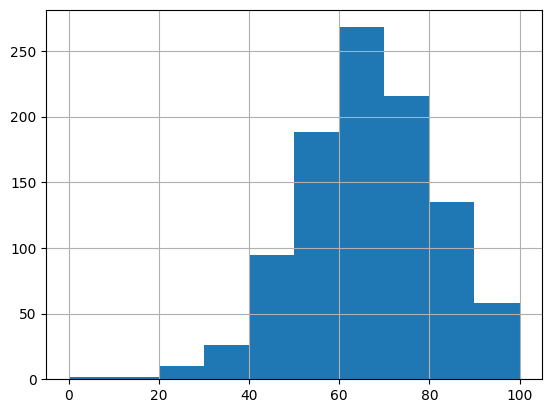

In [8]:
y.hist();

In [9]:
print('Уникальных значений целевой переменной - ', len(set(y)))

Уникальных значений целевой переменной -  81


# 4. Основные статистики по переменным

In [10]:
X.describe()

,reading score,writing score
count,1000.000000,1000.000000
mean,69.169000,68.054000
std,14.600192,15.195657
min,17.000000,10.000000
25%,59.000000,57.750000
50%,70.000000,69.000000
75%,79.000000,79.000000
max,100.000000,100.000000


In [11]:
y.describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math score, dtype: float64

# 5. Основная информация по датасету

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# 6. Количество пропусков в колонках

In [13]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Нам повезло - пропущенных значений не обнаружено. Но если были бы то можно заменить их медианой по всем значениям

# 7. Построение 5-ти любых гистограм множества X

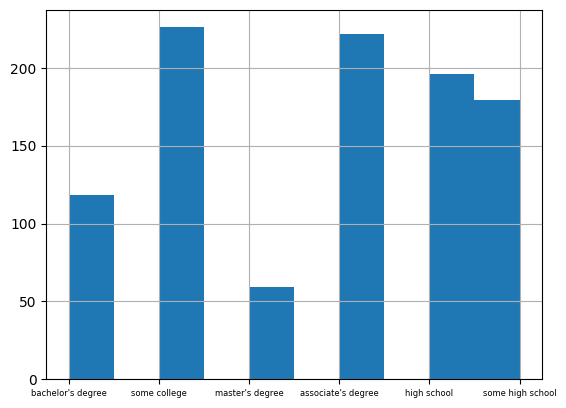

In [14]:
X['parental level of education'].hist(xlabelsize=6);

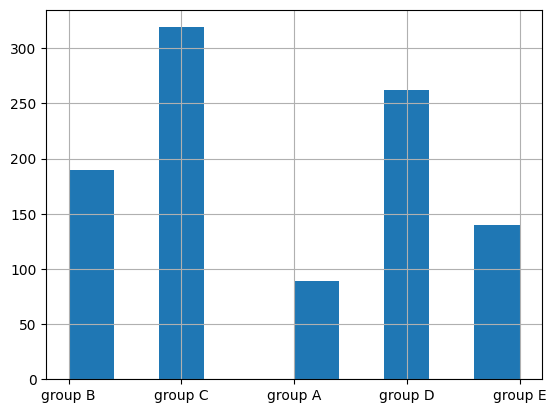

In [15]:
X['race/ethnicity'].hist();

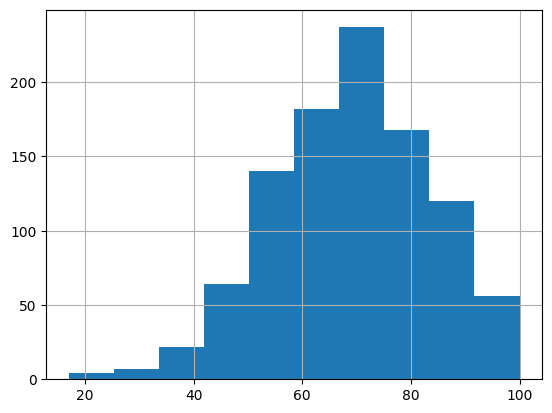

In [16]:
X['reading score'].hist();

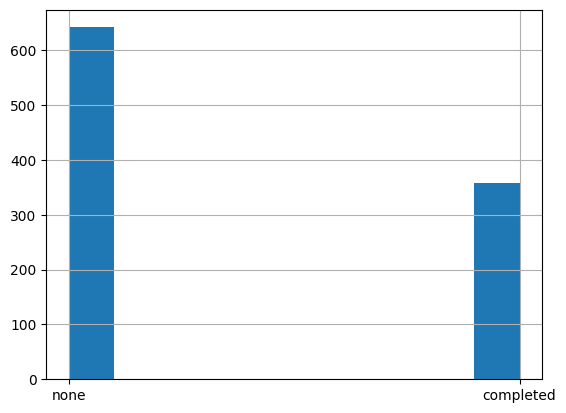

In [17]:
X['test preparation course'].hist();

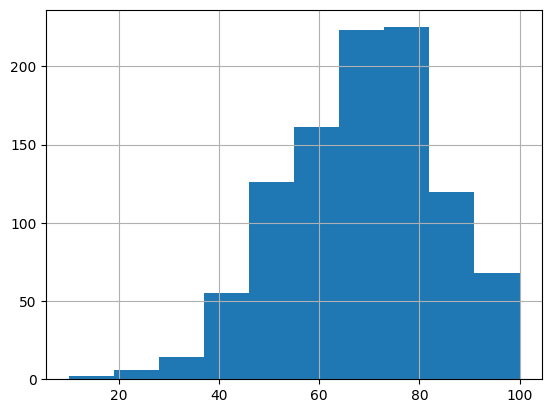

In [18]:
X['writing score'].hist();

# 8. Графики зависимости 5 случайных переменных от целевой переменной

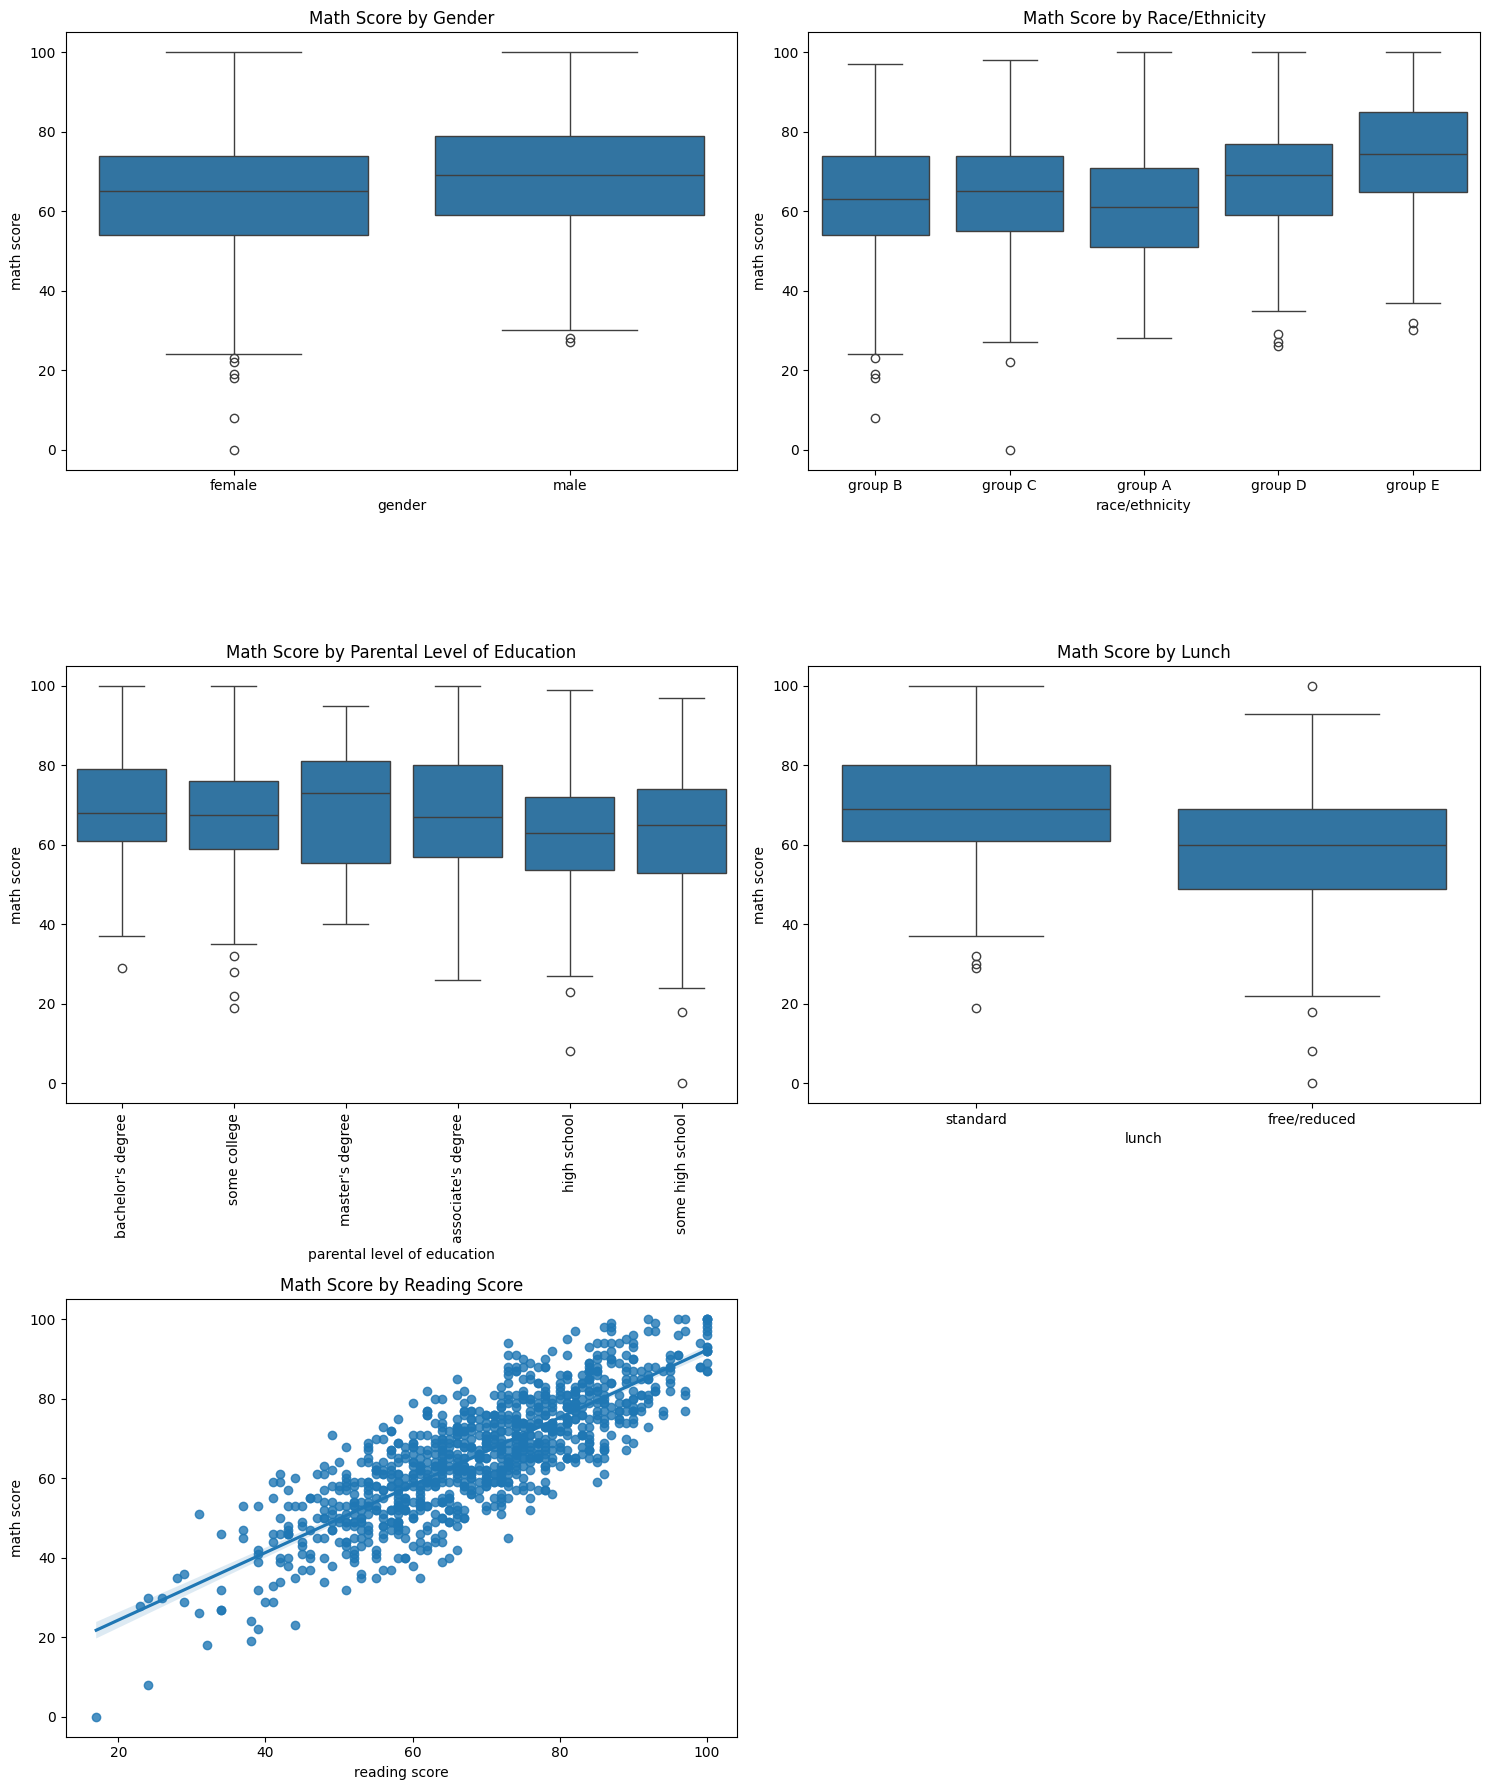

In [19]:
# Создаем фигуру и оси для графиков
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Создаем графики зависимости переменных от целевой переменной
sns.boxplot(x='gender', y='math score', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Math Score by Gender')

sns.boxplot(x='race/ethnicity', y='math score', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Math Score by Race/Ethnicity')

sns.boxplot(x='parental level of education', y='math score', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Math Score by Parental Level of Education')
axes[1, 0].tick_params(axis='x', rotation=90)

sns.boxplot(x='lunch', y='math score', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Math Score by Lunch')

sns.regplot(x='reading score', y='math score', data=data, ax=axes[2, 0])
axes[2, 0].set_title('Math Score by Reading Score')

# Отключаем пустую ось
axes[2, 1].axis('off')

# Настраиваем отображение графиков
plt.tight_layout()
plt.show()

# 9. Heatmap

In [26]:
X.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
reading score                   int64
writing score                   int64
dtype: object

In [27]:
X = X.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course'], axis=1)

In [28]:
X.dtypes

reading score    int64
writing score    int64
dtype: object

In [29]:
X_norm = (X-X.min ())/ (X.max () - X.min ())

In [30]:
X_norm.head()

,reading score,writing score
0,0.662651,0.711111
1,0.879518,0.866667
2,0.939759,0.922222
3,0.481928,0.377778
4,0.734940,0.722222


<Axes: >

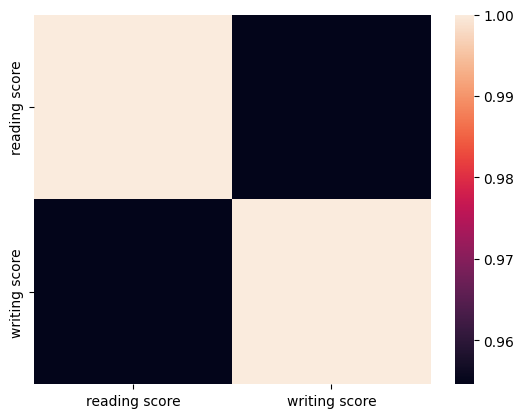

In [31]:
sns.heatmap(X_norm.corr())